<a href="https://colab.research.google.com/github/Vigneshthanga/258-Deep-Learning/blob/master/Assignment-2/boolean_entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing library for module autoreload

In [0]:
#To plot the graph in the output cell and save it with notebook
%matplotlib inline

#To reload all modules before executing a new line
%reload_ext autoreload
%autoreload 2

## Importing libraries

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from matplotlib import pyplot as plt

2.2.0-rc3


## Mounting Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Path for the data

In [0]:
data_dir = '/content/gdrive/My Drive/Colab Notebooks/tennis_squash_data'

## Importing tf's ImageDatagenerator

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Applied Image augmentation on the raw data using parameters - shear_range, zoom_range and horizontal_flip

In [0]:
train_datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

## We have data separated in folders according to the class labels. So, we are using datagenerator's flow_fron_directory() function

In [0]:
train_generator = train_datagen.flow_from_directory( directory=data_dir+"/train/", target_size=(100, 100), color_mode="grayscale", batch_size=32, class_mode="categorical", shuffle=True, seed=42)

Found 552 images belonging to 2 classes.


## While loading the validation data, which is different from train data we should not do shuffle

In [0]:
valid_generator = train_datagen.flow_from_directory(directory=data_dir+"/valid/", target_size=(100,100), color_mode="grayscale", batch_size=32, class_mode='categorical', shuffle=False, seed=42)

Found 60 images belonging to 2 classes.


## Getting the class labels from the loaded data

In [0]:
classes = list(train_generator.class_indices.keys())
print(classes)

['squash', 'tennis']


In [0]:
train_generator.class_indices

{'squash': 0, 'tennis': 1}

## Getting the iterator object from the datagenerator class

In [0]:
iterator = train_generator.__iter__()

In [0]:
x,y = iterator.next()

## A sample input shape. We can see that all images are now uniformly trimmed to size of (100,100)

In [0]:
x.shape

(32, 100, 100, 1)

## Visualizing the loaded dataset

tennis


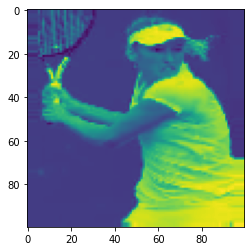

squash


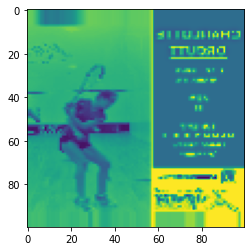

squash


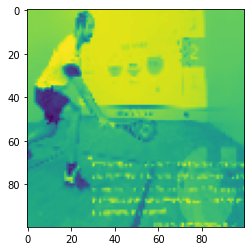

squash


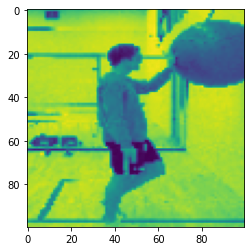

tennis


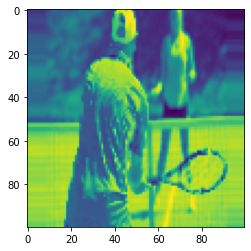

tennis


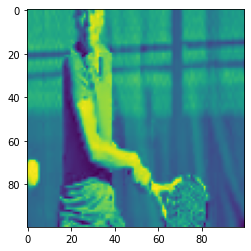

tennis


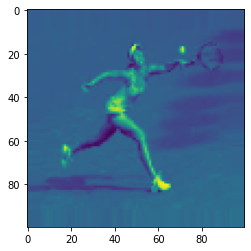

tennis


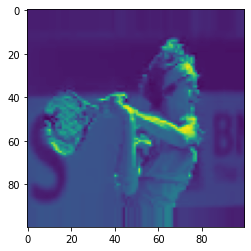

squash


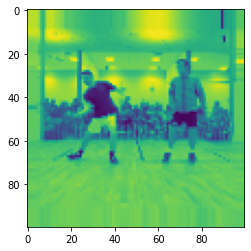

tennis


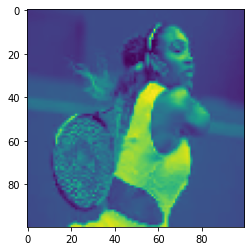

In [0]:
import numpy as np
for i in range(0,10):
    image = x[i]
    #print(image.shape)
    print(classes[tf.argmax(y[i], axis=0)])
    plt.imshow(image.reshape(100,100))
    plt.show()

## Model definition for classification task:

Below sequential layers are stacked up twice: 

1. Sequential layer followed by 2D convoluation layer having kernel size of (3,3) and having a Relu activation layer before feeding to the next layer
2. Added Batch Normalization
3. MaxPooling layer added of size 2
4. 2% dropout layer added
5. Then comes the flatten layer of size 256 with Relu activation
6. Then we have 2 node Sigmoid activation layer. If we are not using binary_crossentropy as loss function, we can use the softmax layer directly.

In [0]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=300, kernel_size=(3,3), kernel_initializer=tf.keras.initializers.he_normal(), padding='same', activation='relu', input_shape=(100,100,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=300, kernel_size=(3,3), kernel_initializer=tf.keras.initializers.he_normal(), padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 300)     3000      
_________________________________________________________________
batch_normalization_12 (Batc (None, 100, 100, 300)     1200      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 300)       0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 50, 50, 300)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 300)       810300    
_________________________________________________________________
batch_normalization_13 (Batc (None, 50, 50, 300)       1200      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 300)      

## Compile the model with below hyper parameters - 


1.   loss - binary_crossentropy
2.   optimizer - Adam
3.   metrics - accuracy



In [0]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

## Training the model using the regular K fold cross validation. Trained for a total of 10 epochs

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
17/17 [==============================] - 174s 10s/step - loss: 27.8698 - accuracy: 0.7712 - val_loss: 110.4534 - val_accuracy: 0.9375
Epoch 2/10
17/17 [==============================] - 183s 11s/step - loss: 6.7474 - accuracy: 0.8713 - val_loss: 20.5873 - val_accuracy: 0.8125
Epoch 3/10
17/17 [==============================] - 175s 10s/step - loss: 2.4984 - accuracy: 0.8712 - val_loss: 2.2324 - val_accuracy: 0.8438
Epoch 4/10
17/17 [==============================] - 167s 10s/step - loss: 1.1590 - accuracy: 0.8750 - val_loss: 0.3430 - val_accuracy: 0.8125
Epoch 5/10
17/17 [==============================] - 167s 10s/step - loss: 0.3462 - accuracy: 0.9038 - val_loss: 0.3078 - val_accuracy: 0.8750
Epoch 6/10
17/17 [==============================] - 166s 10s/step - loss: 0.2751 - accuracy: 0.8923 - val_loss: 0.5250 - val_accuracy: 0.8125
Epoch 7/10
17/17 [==============================] - 166s 10s/step - loss: 0.3148 - accuracy: 0.8981 - val_loss: 0.6560 - val_accuracy: 0.7812
Ep

## Save the mode usign tf's save_model() which will be saved in protocol buffer format. This model can then be directly loaded used for doing classification on related dataset in real time.

In [0]:
tf.keras.models.save_model(
    model, '/content/gdrive/My Drive/tennis_model', overwrite=True, include_optimizer=True, save_format='tf',
    signatures=None, options=None
)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/tennis_model/assets


## Evaluate again the model using the same validation step. We can use a separate test data also for this. 

In [0]:
score = model.evaluate_generator(generator=valid_generator,steps=STEP_SIZE_VALID)

In [0]:
print(score)

[0.19632714986801147, 0.84375]


In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
valid_generator.classes.shape

(60,)

In [0]:
y_pred.shape

(60,)

In [0]:
classes

['squash', 'tennis']

## Model result using confusion matrix and Classification report.

In [0]:
y_pred = model.predict_generator(valid_generator, steps=(valid_generator.n // valid_generator.batch_size)+1)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
print('Confusion Matrix')
#confusion_matrix()
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
print(classification_report(valid_generator.classes, y_pred, target_names=classes))

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0
 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0]
Confusion Matrix
[[25  5]
 [11 19]]
Classification Report
              precision    recall  f1-score   support

      squash       0.69      0.83      0.76        30
      tennis       0.79      0.63      0.70        30

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

